In [2]:
## 3.1. evaluation metrics 
# (https://towardsdatascience.com/evaluation-metrics-for-machine-learning-2167fca1a291)

# supervised evaluation metrics

# common classification metrics:
# accuracy
# precision (P)
# recall (R)
# F1 score (F1)
# area under the ROC (receiver operating characterisitc) curve or simpler AUC (AUC)
# log loss
# precision at k (P@k)
# average precision at k (AP@k)
# mean average precision at k (MAP@k)

# common regression metrics:
# mean absolute error (MAE)
# mean squared error (MSE)
# root mean squared error (RMSE)
# root mean squared logarithmic error (RMSLE)
# mean percentage error (MPE)
# mean absolute percentage error (MAPE)
# r^2 (R2 score)

# knowing how these metrics work is important, but also knowing where to use them and on what kind of data

In [3]:
# if we have a binary classification problem where there are an equal number of positive and negative samples
# (e.g. over 100 sample 50 are positive and 50 negative)
# we generally use accuracy, precision, recall and f1

In [4]:
# create some data to test
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [5]:
# accuracy
# accuracy is one of the most straighforward metrics - if your model takes 100 images and correctly classifies 90 of them
# the accuracy score is 90%

def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
           # if predicition is equal to truth, increase counter
           correct_counter += 1
            
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

print('accuracy:' + str(accuracy(l1, l2)))

accuracy:0.625


In [6]:
# also accuracy can be calculated using a built-in from scikit-learn
from sklearn import metrics
print('accuracy:' + str(metrics.accuracy_score(l1, l2)))

accuracy:0.625


In [7]:
# if the datset was changed slightly so that 90 samples were negative and 10 were positive, and cross validation had
# been done in a manner so that the ratio was preserved 
# if you predicit all samples to be negative, the accuracy score would be 90% - without building a model
# this is due to the large skew of the dataset
# in these cases accuracy isn't the best metric to use (as you might get a high value for a bad model)

# in these cases precision is a better metric

In [8]:
# before looking at precision first we need to define some terms:

# true positive (TP)
# given a sample, if the model predicts it to be positive and the target is positive it is a true positive

# true negative (TN)
# given a sample, if the model predicts it to be negative and the target is negative it is a true negative

# false positive (FP)
# given a sample, if the model predicts it to be positive and the target is negative it is a false positive

# false negative (FN)
# given a sample, if the model predicts it to be negative and the target is positive it is a false negative

# (assume in the dataset that 1 is positive and 0 is negative and it is a binary classification)

def true_positive(y_true, y_pred):
    """
    Function to calculate true positives
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate true negatives
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate false positive
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate false negative
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: number of false negative
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

print('number of true positives: ' + str(true_positive(l1, l2)))
print('number of true negatives: ' + str(true_negative(l1, l2)))
print('number of false positives: ' + str(false_positive(l1, l2)))
print('number of false negatives: ' + str(false_negative(l1, l2)))

number of true positives: 2
number of true negatives: 3
number of false positives: 1
number of false negatives: 2


In [9]:
# we can define accuracy using the terms above
# accuracy score = (TP + TN)/(TP+TN+FP+FN)

def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: accuracy score
    """  
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp +fn)
    return accuracy_score

print('accuracy(V2): ' + str(accuracy_v2(l1, l2)))

accuracy(V2): 0.625


In [10]:
# precision
# precision = TP / (TP + FP)

# if the model predicts:
# TP: 8
# TN: 80
# FP: 10
# FN: 2

# then precision is 8/(8+10) = 0.444 so the model is correct 44.4% of the time when trying to identify a positive sample

def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

print('precision: ' + str(precision(l1, l2)))

precision: 0.6666666666666666


In [11]:
# recall
# recall = TP / (TP + FN)

# if the model predicts:
# TP: 8
# TN: 80
# FP: 10
# FN: 2

# then recall is 8/(8+2) = 0.80 so the model correctly identifies 80% of positive samples

def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

print('recall: ' + str(recall(l1, l2)))

recall: 0.5


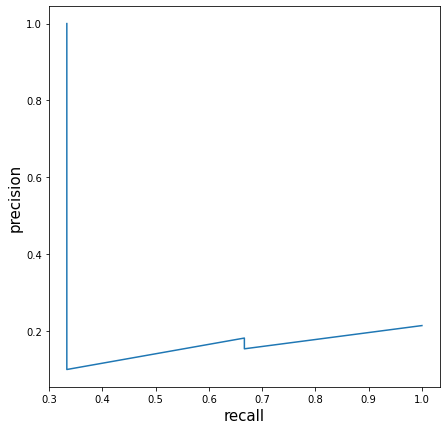

In [12]:
# precision-recall curve
# most models predict a probability, and we usually use a threshold value of 0.5
# if this value is changed, the values of precision and recall can change drastically 
# if for every threshold value we choose we calculate precision and recall we can plot and define a curve
# this is the precision-recall curve

# create some data
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# these are the probability predictions (which most of the time are calculated at 0.5)
y_pred=  [0.02638412, 0.11114267, 0.31620708,
          0.04909370, 0.01914910, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.07937700, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

precisions = []
recalls = []

# threshold values - don't worry yet how these are obtained
thresholds = [0.04909370, 0.05934905, 0.07937700,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary and append calculated precisions and recalls
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)
    
# now plot these values
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('recall', fontsize=15)
plt.ylabel('precision', fontsize=15)
plt.show()

In [13]:
# the precision-recall curve looks very different from what is normally seen - this is due to a low sample number (20)
# and only 3 of them were positive
# it is difficult to choose a value for the threshold that give both a good precision and recall
# if the threshold is too high then you have a smaller number of true positives and a higher number of false negatives
# this will decrease the recall score however, the precision score will be high 
# if you reduce the threshold too low the false positive will increase a lot and precision will be less

# both precision and recall range from 0 to 1 and a value to 1 is better

In [14]:
# F1 score
# the f1 metric combines both precision and recall - it is the weighted average (harmonic mean) of P and R
# F1 = 2PR / (P + R)
# or written as
# F1 = 2TP / (2TP + FP + FN)

def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2 * p * r / (p + r)
    
    return score

print('f1 score: ' + str(f1(l1, l2)))

f1 score: 0.5714285714285715


In [15]:
# also the f1 socre can be calculated using a built-in from scikit-learn
from sklearn import metrics
print('accuracy:' + str(metrics.f1_score(l1, l2)))

accuracy:0.5714285714285715


In [16]:
# this means instead of just looking at precision and recall individually, the f1 score can be used
# like prcision, recall and accuracy, the f1 score is ranges from 0 to 1 with 1 being perfect
# when dealing with datasets that have a skew, we should look at f1 (or precision and recall) instead of accuracy

In [17]:
# other metrics
# true positive rate (TPR)
# TPR = TP / (TP + FN)
# this is the same as recall

def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: tpr
    """
    return recall(y_true, y_pred)

# false positive rate (FPR)
# FPR = FP / (TN + FP)

def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_ture: list of true vlaues
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

print('tpr: ' + str(tpr(l1, l2)))
print('fpr: ' + str(fpr(l1, l2)))

# also 1-FPR
# known as specificity or true negative rate (TNR)

tpr: 0.5
fpr: 0.25


thresh:   [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
tpr_list: [1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]
fpr_list: [1.0, 0.9, 0.7, 0.6, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]


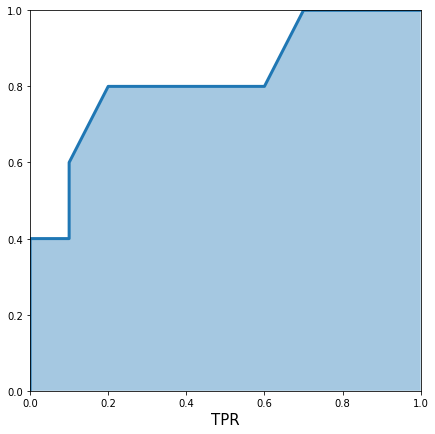

In [18]:
# out of these terms, TPR and FPR are the most important 
# lets calculate these terms for different thresholds

# empty lists to store tpr and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr 
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
print('thresh:   ' + str(thresholds))
print('tpr_list: ' + str(tpr_list))
print('fpr_list: ' + str(fpr_list))

# we can then plot these lists with tpr on the y-axis and fpr on the x-axis
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.xlabel('TPR', fontsize=15)
plt.show()

In [19]:
# this curve is known as the receiver operating characterisitc (ROC)
# if we calculate the area under the ROC we get another metric, known as the area under the ROC curve
# or area under curve (AUC)
# there is a built in from sci-kit learn that allows this to be calculated

from sklearn import metrics
print('AUC: ' + str(metrics.roc_auc_score(y_true, y_pred)))

AUC: 0.8300000000000001


In [20]:
# AUC values range from 0 to 1

# a value of 1 implies a perfect model (however this in practice normally means a mistake in cross validation)
# a value of 0 implies your model is very bad (or very good). Here try inverting the probabilities for the predictions
# if the probability for the positive class is p, try 1-p. This kind of AUC may also mean there is a problem with cross
# validation or data processing
# a value of 0.5 implies that the predictions are random. if you predict all targets as 0.5, the AUC will be 0.5
# therefore a value between 0 and 0.5 implies the model is worse than random (this is likely due to the classes being 
# inverted and therefore try to run again with after inverting some classes)
# say a model gives a score of 0.85, this means when a positive and negative sample are selected then the positive sample
# will rank higher than the negative sample with a probability of 0.85

# after obtaining the AUC you then make predictions on the test set
# depending on the problem you will either want the probabilites or the acutal classes
# the probabilities are already there, but to get the classes you need to select a threshold
# for binary classifiction you can noramlly do something like:
# prediction = probability >= threshold
# this means that prediction is a new list that only contains binary variables (an item is 1 if the probability is greater
# than or equal to the threshold and 0 for below)

# you can use the ROC curve to choose the threshold, as it shows the tpr and fpr, and in turn tp and fp for different 
# thresholds. then choose the threshold depending what you want to optimise for your problem
# therefore if you don't want many fp, choose a high threshold, but this will give more fn - it is a trade-off

# we can see how thresholds effect tp and fp values

# empty lists to store true positive and false positive values
tp_list = []
fp_list = []

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)
    
print('thresh:  ' + str(thresholds))
print('tp_list: ' + str(tp_list))
print('fp_list: ' + str(fp_list))

# usually looking at the top left value on the ROC give a good threshold, this is 0.6
# looking at the tp and fp values this means we don't loose too many tp and neither are there too many fp

# the AUC is widely used for skewed binary classification problems 

thresh:  [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
tp_list: [5, 5, 5, 4, 4, 4, 4, 3, 3, 2, 2, 1, 0]
fp_list: [10, 9, 7, 6, 3, 3, 2, 1, 1, 1, 0, 0, 0]


In [21]:
# another important metric is the log loss metric
# for a binary clasification it is defined as:
# log loss = - 1.0 * (target*log(prediction) + (1 - target)*log(1 - prediction))
# where target is either 0 or 1 and prediction is a probability of a sample belonging to class 1
# for multiple samples in a dataset, the log loss over all samples is the average for all individual log losses
# the log loss penalizes quite high for an incorrect or far-off prediction - it penalizes for being very sure and 
# very wrong
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_ture: list of true vlaues
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon values - this can also be input
    # this values is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store individual losses 
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust the probability 
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

# test log loss function
y_true = [0, 0, 0, 0, 1, 0, 1, 
          0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

print('log_loss: ' + str(log_loss(y_true, y_proba)))

# check with sklearn built in
from sklearn import metrics
print('log_loss form sklearn: ' + str(metrics.log_loss(y_true, y_proba)))
      
# log loss penalizes a lot more than other metrics
# if you were 51% sure about a sample belonging to class 1, the log loss would be:
# -1.0*(1*log(0.51)+(1-1)*log(1-0.51)) = 0.67
# and for 49% sure that a sample belonged to class 0:
# -1.0*(0*log(0.49)+(1-0)*log(1-0.49)) = 0.67
# therefore even if 0.5 gives perfect predictions, you will still have a high loss
# any non-confident prediction will have a very high log loss

log_loss: 0.49882711861432294
log_loss form sklearn: 0.49882711861432294


In [22]:
# most of the metrics discussed up to this point can be converted for multi-class classification problems
# lets take precision and recall and convert to a multi-class version

# there are three different ways to calculate this (lets look at percision):
# macro averaged precision - calculate precision from all classes individually and then average
# micro averaged precision - calculate class wide true positive and false positive, then use this to calculate precision
# overall
# weighted precision - same as macro but in this case it is the weighted average depending on the number of items in each
# classs

import numpy as np

def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true vlaues
    :param y_pred: list of predicted values
    :return: macro averaged precision score
    """
    # find the number of classes by taking the length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes execpt current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # calculate precision for current class
        temp_precision = tp / (tp +fp)
        # keep adding precision for all classes
        precision += temp_precision
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true vlaues
    :param y_pred: list of predicted values
    :return: micro averaged precision score
    """
    # find the number of classes by taking the length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)
        # calculate false positive for current class and update overall fp
        fp += false_positive(temp_true, temp_pred)
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

from collections import Counter

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true vlaues
    :param y_pred: list of predicted values
    :return: weighted averaged precision score
    """
    # find the number of classes by taking the length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary 
    # e.g. {0:25, 1:15, 2:21}\
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

# test functions against sklearn
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2 ,1, 0, 2, 1, 0, 0, 2]

print('macro')
print('own:' + str(macro_precision(y_true, y_pred)))
print('sklearn: ' + str(metrics.precision_score(y_true, y_pred, average="macro")))

print('micro')
print('own:' + str(micro_precision(y_true, y_pred)))
print('sklearn: ' + str(metrics.precision_score(y_true, y_pred, average="micro")))

print('weighted')
print('own:' + str(weighted_precision(y_true, y_pred)))
print('sklearn: ' + str(metrics.precision_score(y_true, y_pred, average="weighted")))

macro
own:0.3611111111111111
sklearn: 0.3611111111111111
micro
own:0.4444444444444444
sklearn: 0.4444444444444444
weighted
own:0.39814814814814814
sklearn: 0.39814814814814814


In [23]:
# the recall metric can also be implemented for multi-class in a simular way 
# both precision and recall depend on true positive, false positive and false negative
# f1 depends on precision and recall

# these are implemented in a simular way to the above precision
# as an example the f1 multi-class weighted average is shown here:

from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true vlaues
    :param y_pred: list of predicted values
    :return: weighted f1 score
    """
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # e.g. {0:20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
        # calculate overall f1 by dividing by total number of samples
        overall_f1 = f1 / len(y_true)
        return overall_f1
    
# test functions against sklearn
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2 ,1, 0, 2, 1, 0, 0, 2]

print('weighted f1')
print('own: ' + str(weighted_f1(y_true, y_pred)))
print('sklearn: ' + str(metrics.f1_score(y_true, y_pred, average="weighted")))

### THIS DOES NOT MATCH -- CHECK CODE!!! ###

weighted f1
own: 0.2857142857142857
sklearn: 0.41269841269841273


Text(0.5, 48.5, 'Predicted Labels')

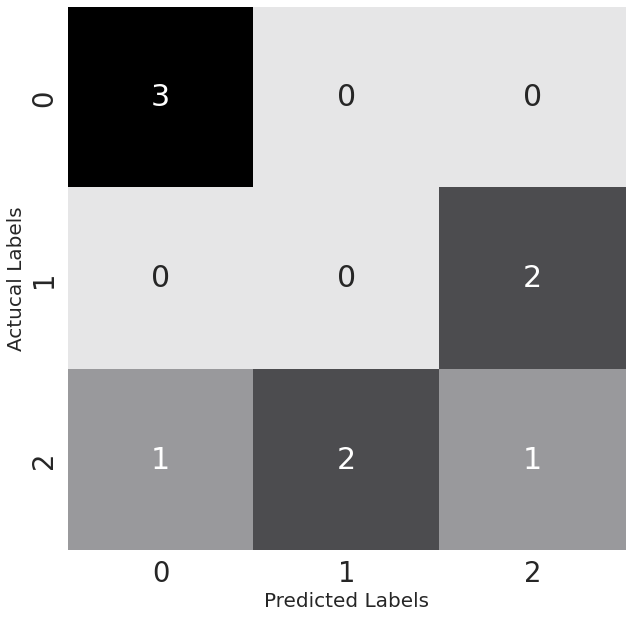

In [25]:
# AUC and log loss can be converted to multi-class formats too (this conversion is known as on-vs-all)
# for binary and multi-class classification it is also popular to look at the confusion matrix
# this is a table of TP, FP, TN, and FN
# it can be used to see how many samples were miscalssified ans how many were correctly classified
# to build the confusion matrix we just need TP, FP, TN, FN - this is also true of precision, recall, f1
# and AUC
# FP can sometimes be called a type-I error and FN as type-II error

# the confusion matrix can also be expanded from binary to multi-class
# if there are N classes, the matrix has shape NxN
# if we have the following acutal classes:
#        [0, 1, 2, 0, 1, 2, 0, 2, 2]
# and the predictions are:
#        [0, 2, 1, 0, 2, 1, 0, 0, 2]
# the matrix would look like:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
# predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot figure
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actucal Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)


# looking at class 0, there are three in the targets (acutal), and four in the predicted
# three were in in the correct place, and plot 0, 0. the other was in the place of class 2 and plot 0, 2
# a perfect matrix should just be filled along the diagonal with zeros elsewhere

In [28]:
# so far we have metrics for binary and multi-class, now we need metrics for the other type of classification problem
# multi-label classification:
# this is where each sample has one or more label associated with it (e.g. different objects within a given image)

# the metrics for these problems are:
# precision at k (P@k)
# average precision at k (AP@k)
# mean average precision at k (MAP@k)
# log loss

# P@k:
# https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52
# 

def pk(y_true, y_pred, k):
    """
    Function to calculate precision at k
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: precision at a given k
    """
    # if k is 0 return 0 - this should never happen as k is always >= 1
    if k == 0:
        return 0
    # interested in only top k predictions
    y_pred = y_pred[:k]
    # convert predictions to set
    pred_set = set(y_pred)
    # convert actual to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

# we also have AP@k (P@1 to P@k and averaged)
def apk(y_true, y_pred, k):
    """
    Function to calculate average precision at k for single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given k
    """
    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append list
        pk_values.append(pk(y_true, y_pred, i))
    # if we have no values in list return 0
    if len(pk_values) == 0:
        return 0
    # else return sum of list over length of list
    return sum(pk_values) / len(pk_values)

# we can then use the two functions to calculate the AP@k for two lists

y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1], 
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(
        f"""
        y_true={y_true[i]}
        y_pred={y_pred[i]}
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """
        )

# this is how we get AP@k which is per sample
# however we are generally interested in all samples and therefore use MAP@k


        y_true=[1, 2, 3]
        y_pred=[0, 1, 2]
        AP@1=0.0
        

        y_true=[1, 2, 3]
        y_pred=[0, 1, 2]
        AP@2=0.25
        

        y_true=[1, 2, 3]
        y_pred=[0, 1, 2]
        AP@3=0.38888888888888884
        

        y_true=[0, 2]
        y_pred=[1]
        AP@1=0.0
        

        y_true=[0, 2]
        y_pred=[1]
        AP@2=0.0
        

        y_true=[0, 2]
        y_pred=[1]
        AP@3=0.0
        

        y_true=[1]
        y_pred=[0, 2, 3]
        AP@1=0.0
        

        y_true=[1]
        y_pred=[0, 2, 3]
        AP@2=0.0
        

        y_true=[1]
        y_pred=[0, 2, 3]
        AP@3=0.0
        

        y_true=[2, 3]
        y_pred=[2, 3, 4, 0]
        AP@1=1.0
        

        y_true=[2, 3]
        y_pred=[2, 3, 4, 0]
        AP@2=1.0
        

        y_true=[2, 3]
        y_pred=[2, 3, 4, 0]
        AP@3=0.8888888888888888
        

        y_true=[1, 0]
        y_pred=[0, 1, 2]
        AP@1=1.0
        

        y_true

In [32]:
# as AP@k is per sample and we want to consider all samples we use:
# mean average precision at k or MAP@k
# this is just the average of AP@k and can be calculated using the following code:

def mapk(y_true, y_pred, k):
    """
    Function to calculate  mean average precision at k
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean average precision at a given k
    """
    # initalize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
    # return mean of apk values in list
    return sum(apk_values) / len(apk_values)

# we can use the lists before can look at the MAP@k values
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1], 
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

print('MAP@1: ' + str(mapk(y_true, y_pred, k=1)))
print('MAP@2: ' + str(mapk(y_true, y_pred, k=2)))
print('MAP@3: ' + str(mapk(y_true, y_pred, k=3)))
print('MAP@4: ' + str(mapk(y_true, y_pred, k=4)))

MAP@1: 0.3333333333333333
MAP@2: 0.375
MAP@3: 0.3611111111111111
MAP@4: 0.34722222222222215
